In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
import sympy as sym
import math

In [2]:
MNIST = pd.read_csv('train.csv')

features = MNIST.iloc[:3000,1:].values.reshape((3000,-1))
labels = MNIST.iloc[:3000,0].values.reshape(3000)

train,test,train_labels,test_labels = train_test_split(features,
                                                       labels,
                                                       test_size = 1/3,
                                                       random_state = 0,
                                                       shuffle = True)


clf = MLPClassifier(hidden_layer_sizes = (200,200,200))

In [3]:
def confusion_image(trained_estimator, 
                    test_data, 
                    test_labels,
                    return_type = 'image'):
    
    confidence = trained_estimator.predict_proba(test_data)
    predicted_labels = trained_estimator.predict(test_data)
    
    d = {'Confidence': np.amax(confidence,1), 'Predicted Label': predicted_labels, 'True Label':test_labels}

    df = pd.DataFrame(data=d)
    
    dimensions = len(set(test_labels)),len(set(test_labels))
    
    a = np.zeros(dimensions)
    b = np.zeros(dimensions)
    for i in range(len(set(test_labels))):
        for j in range(len(set(test_labels))):
            a[i][j] = np.mean(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])[0]
            b[i][j] = len(df[(df['Predicted Label'] == i) & (df['True Label'] == j)])
    
    if return_type == 'image':
        plt.figure(figsize=(8, 8))
        image = sns.heatmap(a.T,cmap = 'viridis', annot = b.T, fmt='1', cbar_kws = {'label': 'Confidence'})
        image.set(ylabel = 'True Label', xlabel = 'Predicted Label') 
        sns.set(font_scale = 1.3)
        return image
    
    elif return_type == 'counts':
        return pd.DataFrame(b.T)
    
    elif return_type == 'confidence':
        return pd.DataFrame(a.T)


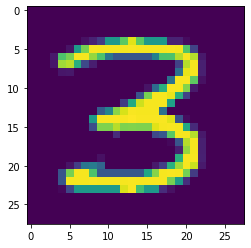

In [4]:
plt.imshow((test[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

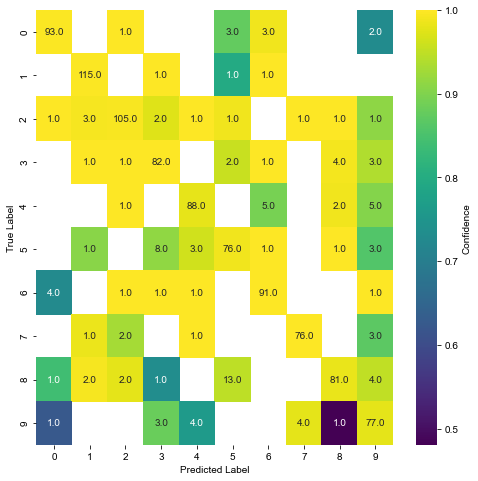

In [5]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test, test_labels)

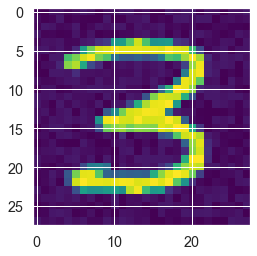

In [6]:
test_10 = test.copy()
for i in test_10:
    i+=np.random.randint(-10,10,784)
plt.imshow((test_10[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

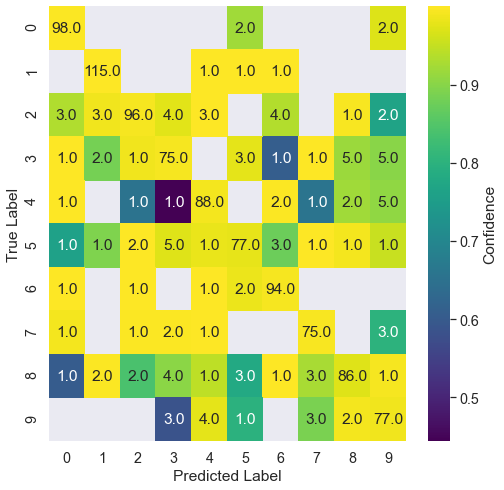

In [7]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_10, test_labels)

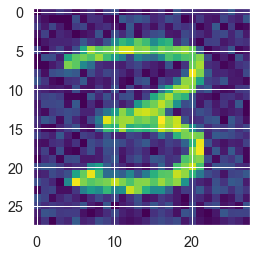

In [8]:
test_50 = test.copy()
for i in test_50:
    i+=np.random.randint(-50,50,784)
plt.imshow((test_50[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

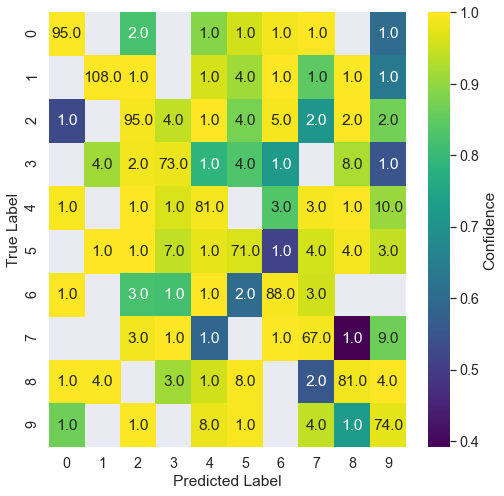

In [9]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_50, test_labels)

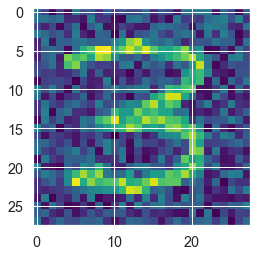

In [10]:
test_100 = test.copy()
for i in test_100:
    i+=np.random.randint(-100,100,784)
plt.imshow((test_100[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

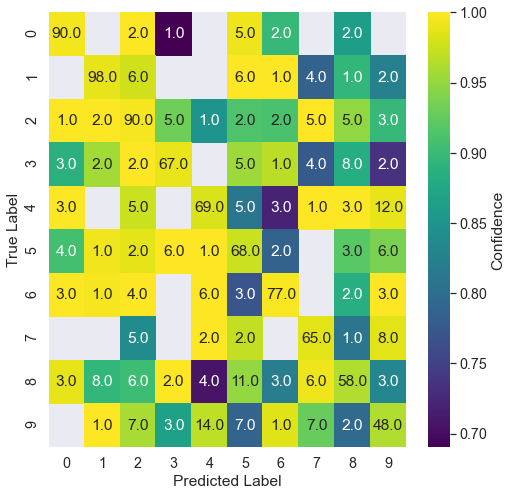

In [11]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_100, test_labels)

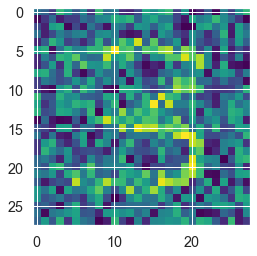

In [12]:
test_250 = test.copy()
for i in test_250:
    i+=np.random.randint(-250,250,784)
plt.imshow((test_250[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

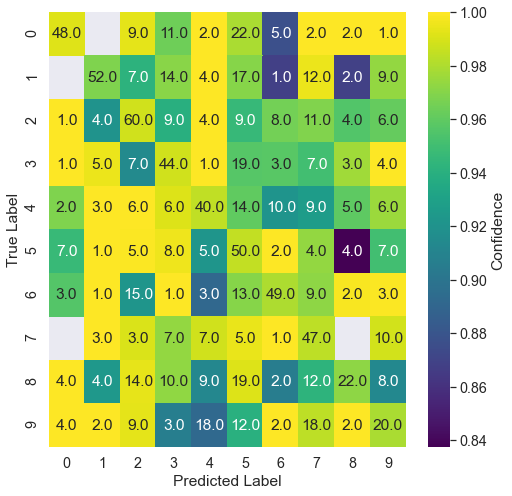

In [13]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_250, test_labels)

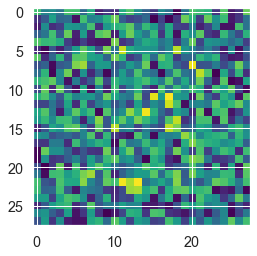

In [14]:
test_450 = test.copy()
for i in test_450:
    i+=np.random.randint(-450,450,784)
plt.imshow((test_450[0].reshape((28,28))),cmap = 'viridis')

<AxesSubplot:xlabel='Predicted Label', ylabel='True Label'>

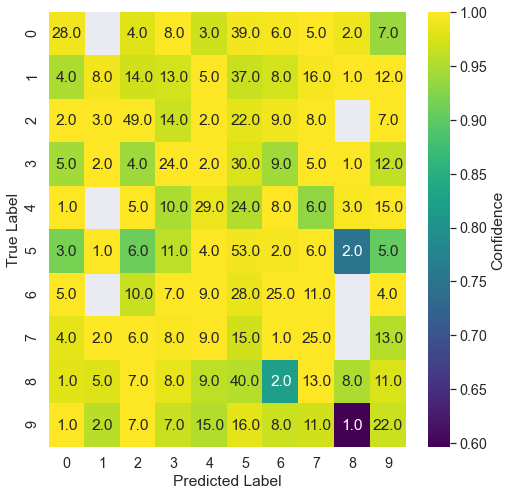

In [15]:
trained_model = clf.fit(train, train_labels)
confusion_image(trained_model, test_450, test_labels)

In [18]:
def plot_noise_to_confidence(trained_estimator,
                             test_data,
                             test_labels,
                             noise_range = [0]):
    x_axis = noise_range
    correct = []
    incorrect = []
    for i in noise_range:
        test_data_copy = test_data.copy()
        for j in test_data_copy:
            if i == 0:
                pass
            else:
                j+=np.random.randint(-i,i,784)
        data = confusion_image(trained_estimator, test_data_copy, test_labels, return_type = 'confidence')
        
        diag = list(np.diag(np.array(data)))
        
        data_copy = data.copy()
        np.fill_diagonal(data_copy.values, np.nan)
        rest = list(np.mean(data_copy))
        
        correct.append(diag)
        incorrect.append(rest)
        
    correct = np.array(correct)
    incorrect = np.array(incorrect)
    
    fig = plt.figure(figsize = (15,20))
    
    for i in range(10):
        ax = fig.add_subplot(5,2,i+1)   
        ax.plot(x_axis, correct[:,i], label = 'confidence of correct classification')
        ax.plot(x_axis, incorrect[:,i], label = 'mean confidence of incorrect classifications')
        ax.set_title('Class {}'.format(i))
        ax.set_xlabel('Noise Range')
        ax.set_ylabel('Confidence')
        ax.legend()
    plt.tight_layout() 

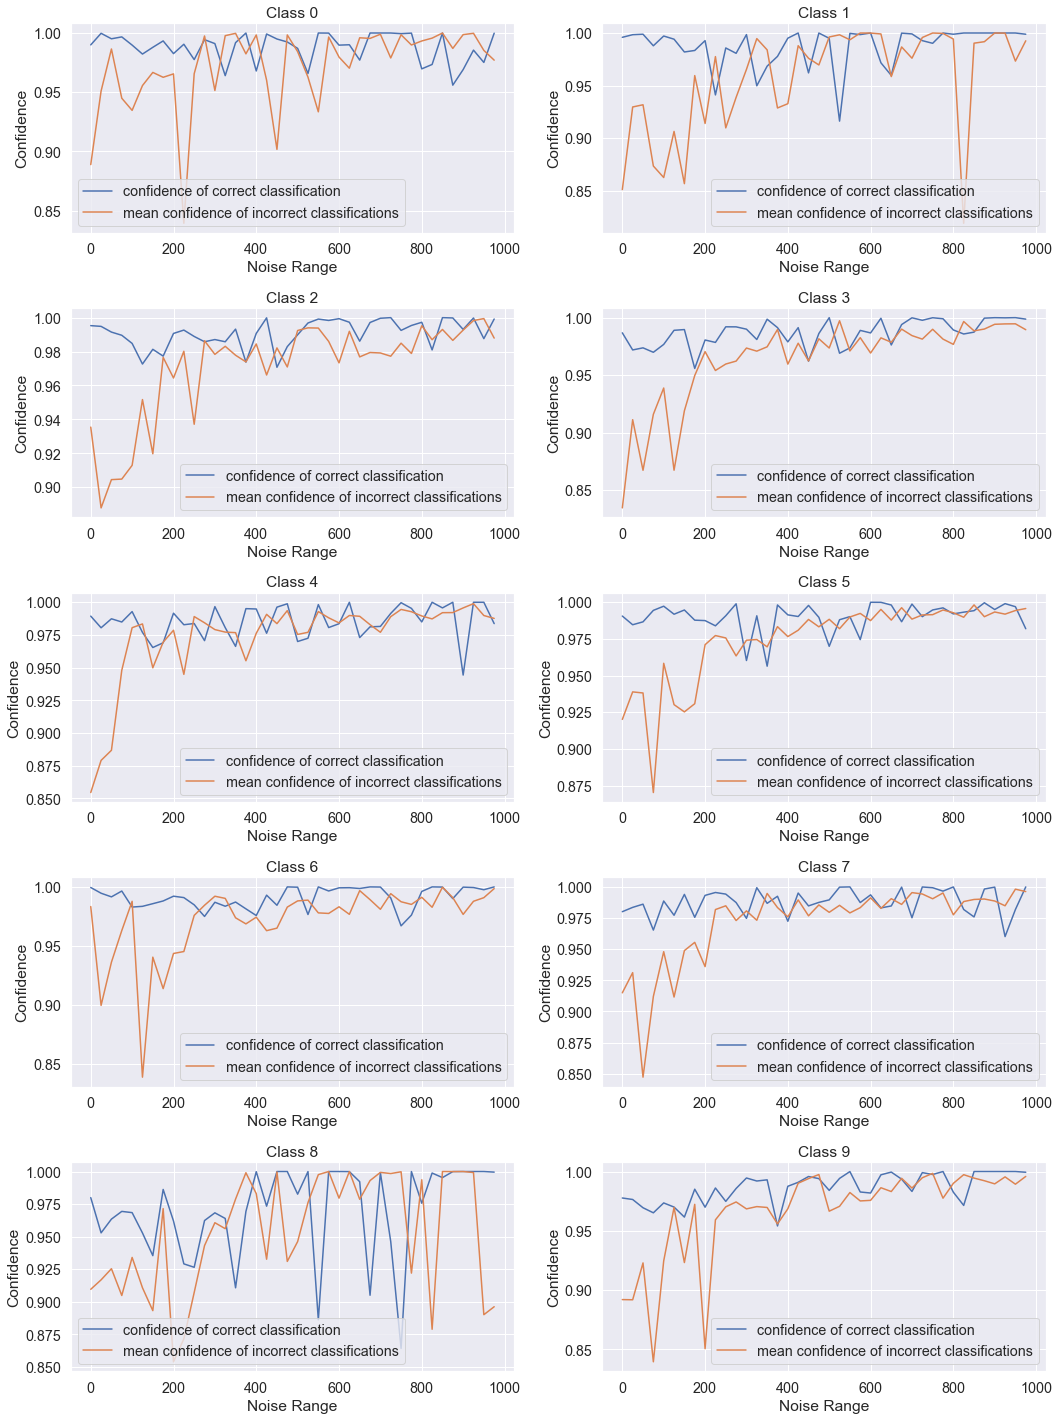

In [20]:
plot_noise_to_confidence(trained_model, test, test_labels, list(np.arange(0,1000,25)))